# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [7]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [8]:
passengers = df_titanic[df_titanic["class"].isin(["1st", "2nd", "3rd"])]

# counts (joint distribution)
counts = pd.crosstab(passengers["class"], passengers["embarked"])

# row-wise proportions within class
row_props = pd.crosstab(passengers["class"], passengers["embarked"], normalize="index")

# overall proportions
overall_props = pd.crosstab(passengers["class"], passengers["embarked"], normalize="all")


overall_props

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [9]:
p_class_given_embark = pd.crosstab(passengers["class"], passengers["embarked"], normalize="columns")
p_embark_given_class = pd.crosstab(passengers["class"], passengers["embarked"], normalize="index")
prop_3rd_embarked_S = p_embark_given_class.loc["3rd", "S"]
prop_S_passengers_3rd = p_class_given_embark.loc["3rd", "S"]


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.


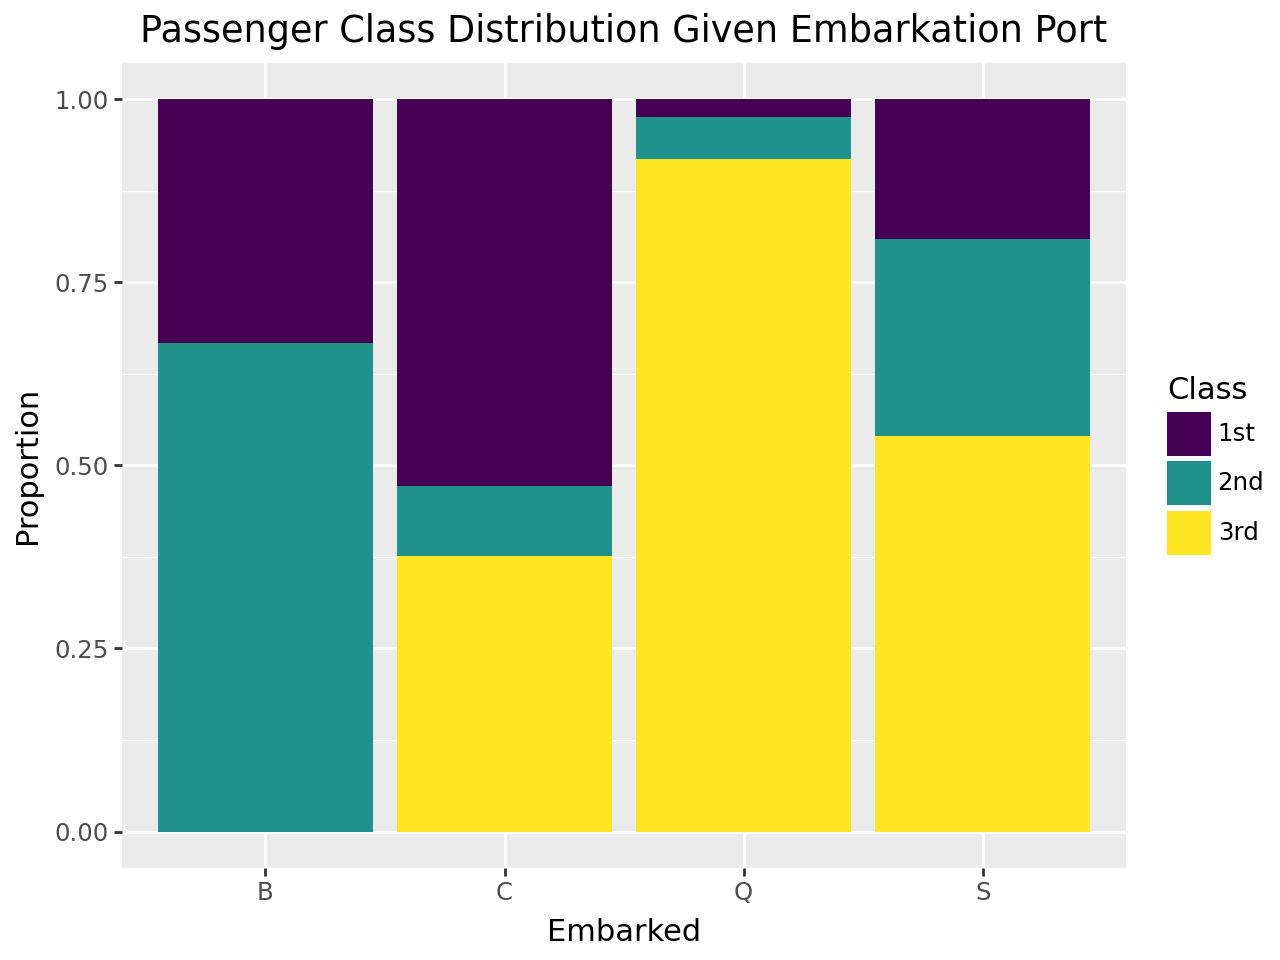

In [10]:


passengers = df_titanic.query("`class` in ['1st','2nd','3rd']").copy()


from plotnine import ggplot, aes, geom_bar, labs
import pandas as pd

passengers["class"] = pd.Categorical(passengers["class"], ["1st","2nd","3rd"], ordered=True)
(
    ggplot(passengers, aes(x="embarked", fill="class"))
    + geom_bar(position="fill")
    + labs(title="Passenger Class Distribution Given Embarkation Port",
           x="Embarked", y="Proportion", fill="Class")
)

The stacked bar chart shows the distribution of passenger class given embarkation port (P(class | embarked)). From it, a little over half of Southampton passengers were 3rd class. However, it does not show P(embarked | class), so it cannot answer “what proportion of 3rd-class passengers embarked at Southampton” (use the row-normalized table for that).

Pros: quick comparison of class mix within each port; bars sum to 1.

Cons: hides sample sizes, middle segments are hard to compare, and it conditions on port rather than class.